#GPX to TXT Converter Information

*   Language: Python
*   Platform: Google Colab/Jupyter notebook
*   Version:  2.0
*   Contact:  michael.akridge@noaa.gov

The following is a simple python script that runs within the Google Colab web  enviroment. It parses a Garmin GPX file & converts the contents to TXT/CSV. The converted gps file is also autodownloaded, and mapped for visual QC. 

# Step 1. Download GPX file from the GPS Unit
How to download GPS Points (Garmin 78 model)
1.	Connect GPS to computer via USB port on back of GPS
2.	Open up “My Computer” Window
*   A GPS will show up as a removable storage device

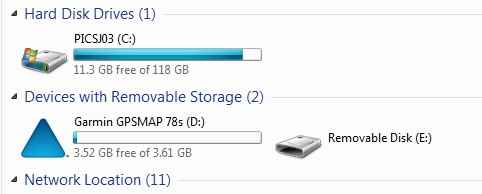

4.	Navigate to GPS file using a path like this: D:\Garmin\GPX
5.	GPS File is automatically broken up in a daily file
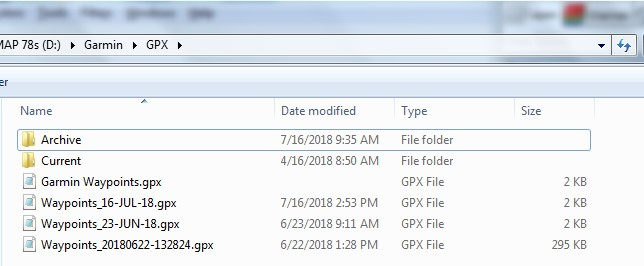
7.	Copy todays waypoint file to GPS Download folder in the cruise folder

Example: 
- “Waypoints_16-JUL-18.gps"
- To T:\Cruise\CruiseData\MP2108\GPS Downloads

Note: 
- 	Make sure to copy to the correct team and GPS folder


# Step 2. Convert GPX to TXT

1. Click the "Files" folder button on the left hand side menu

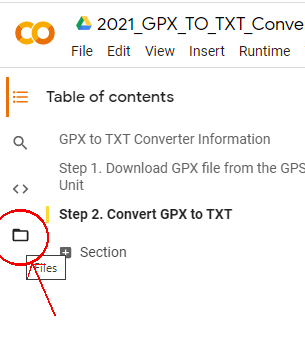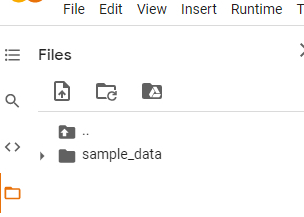
2. Drag and Drop your GPX file to that area within google colab

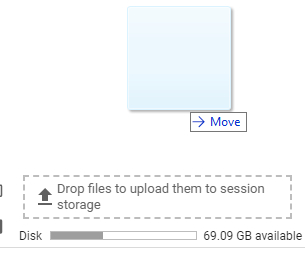
3. Right click your uploaded GPX file

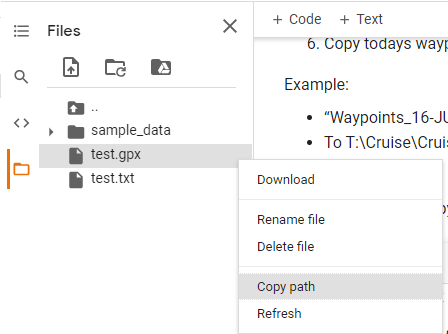

In [ ]:
#@title  { run: "auto", vertical-output: true }

# Import required python packages
import re
import sys
import numpy as np
import pandas as pd
import folium
import datetime
from datetime import datetime, timedelta
fmt = "%Y/%m/%d %H:%M:%S"
#timezonelist = ['UTC','Pacific/Guam']
#@markdown Click "Copy Path" option & paste(ctrl+v) the uploaded file path into the box below
# Setup of header
header = 'ident,lat,long,time,ltime'
#Path of GPS File
GPXfile = '/content/Waypoints_24-APR-22.gpx' #@param {type:"string"}

#formating and spliting of file location
data = open(GPXfile).read()

# Setup New File name for later processes
new_file_name_txt = GPXfile.replace('.gpx', '.txt')
new_file_name_csv = GPXfile.replace('.gpx', '.csv')
#print('|-------- File Loaded -------- |')
#print(' ')
#print(GPXfile)

#@title To convert selected GPX file just click Run button { vertical-output: true }

# Regex  Parse GPX File to find waypoint data
#waypoint_type =  re.findall(r'<type>([^\<]+)',data)
waypoint_name = re.findall(r'<name>([^\<]+)',data)
lat = re.findall(r'lat="([^\"<]+)',data)
lon = re.findall(r'lon="([^\"<]+)',data)
time = re.findall(r'</ele><time>([^\<]+)',data)
datime = re.findall(r'</ele><time>([^\<]+)',data)
#ltime = re.findall(r'<gpxx:ltime>([^\<]+)',data)
newltime = []

UTC_TO_LOCAL_OFFSET = 10 #@param {type:"number"}
#@markdown Press Play Button on Left to Run<br><br>
for i in datime:
  datetime_object = datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ')
  newtime = datetime_object + timedelta(hours=UTC_TO_LOCAL_OFFSET)
  #print(newtime)
  newltime.append(newtime)
#print(newltime)

# Combine Parsed GPX Data
waypoint_data = np.array(list(zip(waypoint_name,lat,lon,time,newltime)))
#waypoint_latlon = np.array(list(zip(lat,lon)))
# Save Combined Parsed GPS Data as TXT
np.savetxt(new_file_name_txt, waypoint_data, delimiter=",", fmt='%s',comments='', header = header)
np.savetxt(new_file_name_csv, waypoint_data, delimiter=",", fmt='%s',comments='', header = header)

# Output information of the process
print('|-------- Process Finished      -------- |')
print('New file name & locaion:',new_file_name_txt)
print('|-------- Downloading Converted GPX File --------|')
print(' ')
from google.colab import files
files.download(new_file_name_txt)
print('|-------- Preview of new data file --------|')
print(' ')
print(open(new_file_name_txt).read())


|-------- Process Finished      -------- |
New file name & locaion: /content/Waypoints_24-APR-22.txt
|-------- Downloading Converted GPX File --------|
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

|-------- Preview of new data file --------|
 
ident,lat,long,time,ltime
051,15.257924,145.816611,2022-04-24T00:07:52Z,2022-04-24 10:07:52
052,15.258630,145.815714,2022-04-24T01:00:40Z,2022-04-24 11:00:40
053,15.258509,145.815569,2022-04-24T01:40:11Z,2022-04-24 11:40:11
054,15.257511,145.816564,2022-04-24T01:47:08Z,2022-04-24 11:47:08
055,15.256160,145.767940,2022-04-24T03:24:32Z,2022-04-24 13:24:32
056,15.256127,145.767580,2022-04-24T04:09:37Z,2022-04-24 14:09:37
057,15.256167,145.767504,2022-04-24T04:49:46Z,2022-04-24 14:49:46

